# Stationary droplet verification case

Evolution of spurious currents for the stationary droplet when using the LENT method. 

The domain is $\Omega : [0,0,0] \times [1.6,1.6,1.6]$ with a spherical interface $\mathit{R} = 0.4$ centered at $[0.800000012,0.799999932,0.800000054]$,to avoid exact overlap with mesh points. The material properties are identical for the droplet and the ambient fluid with the density $\rho = 1$, the kinematic viscosity $\upsilon = [8.165e-2,2.582e-2,8.165e-3,0]$ and a surface tension coefficient of $\sigma = 1$. the values of $\upsilon$ are chosen such that the Laplace number $$ La = \frac{2\mathit{R}\sigma}{\rho\upsilon^2}$$ assumes $La = [120, 1200, 12000, \infty]$. We prescribe Dirichlet boundary conditions for the pressure $p = 0$ on $\partial\Omega$ and for the velocity $\nabla v\bullet n = 0$ on $\partial\Omega$. The initial conditions are $p(t_0) = 0$ and $v(t_0)=0$. Atime step of $\Delta t=0.5\Delta t_{cw}$ is chosen where $$ \Delta t_{cw} = \sqrt{\frac{\rho h^3}{\pi\sigma}}$$ is the time step limit dueto capillary waves.

**SAAMPLE: A Segregated Accuracy-driven Algorithm for Multiphase Pressure-Linked Equations,
Tobias Tolle, Dieter Bothe, Tomislav Maric** __[arXiv](https://arxiv.org/abs/2001.09775v1)__

In [1]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
from notebookPlotting import plot_dframe
from matplotlib import rcParams

idx = pd.IndexSlice

rcParams["figure.dpi"] = 200
plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};

old_state_df = pd.read_csv('saamplePaperConfig_stationaryDroplet_popinet2009.csv', header = 1 )

def plot_comparison(old_df, new_df):
    import matplotlib.pyplot as plt
    rcParams['figure.dpi'] = 200
    rcParams['font.size'] = 8
    import warnings

    def plot_format(resolution):
        """Plots the L_inf(v) error and compares the old_df with new_df for all Laplace numbers for a 
        single mesh resolution."""

        # FIXME: We have to store the Laplace numbers and all other dimensionless numbers in the 
        #        secondary data, to prevent the need for listing them explicitly or re-calculating them.
        laplace_numbers = [120, 1200, 12000, "Inf"]
        viscosities = list(set(old_df["nu_droplet"]))

        N = int(len(viscosities)**0.5)

        fig, ax = plt.subplots(2,2)

        for i,viscosity in enumerate(viscosities): 
            new_state = new_df.loc[idx[[resolution],[viscosity],:]]
            old_state = old_df.loc[(old_df['resolution']==resolution)&(old_df['nu_droplet']==viscosity)]
            row = int(i / N)
            col = int(i % N)
            ax[row,col].plot(new_state['time'], new_state['Linf velocity error'], label='new state')
            ax[row,col].plot(old_state['time'], old_state['Linf velocity error'], label='old state')
            ax[row,col].legend(loc='upper left')
            ax[row,col].set_title(r"$La\ =\ %s$" % laplace_numbers[i])
            ax[row,col].set_yscale('log')
            ax[row,col].set_ylabel('$L_\infty(\mathbf{v})$')
            ax[row,col].set_xlabel('Time $s$')

        fig.tight_layout()      
        fig.subplots_adjust(top=0.88)
        fig.suptitle("Stationary droplet, $N_c$ = %s" % resolution)


    old_resolutions = list(set(old_df["resolution"]))
    old_resolutions.sort()
    new_resolutions = list(set(new_df.index.get_level_values("resolution")))
    new_resolutions.sort()
    resolutions = old_resolutions


    if (old_resolutions != new_resolutions): 
        print("Resolutions available in the old data set = ", old_resolutions)
        print("Resolutions available in the new data set = ", new_resolutions)    
        warnings.warn("Old and new mesh resolutions are not equal, comparing the shorter resolution list!")

        if (len(old_resolutions) > len(new_resolutions)):
            resolutions = new_resolutions

    for resolution in resolutions:
        plot_format(resolution)

# CASE 1: withRhoEquation/withMomentumPredictor/limitedLinearV1

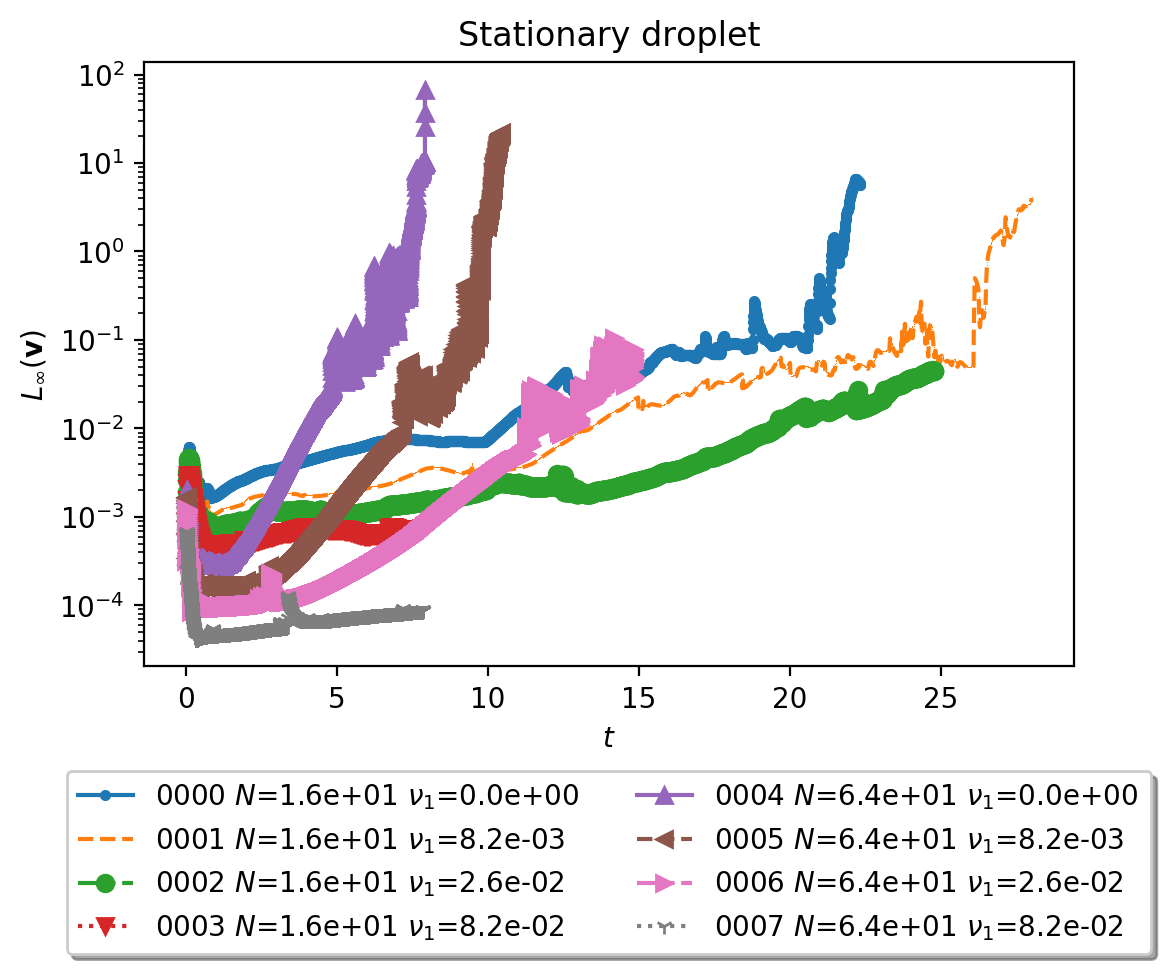

In [2]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom1  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "withRhoEquation/withMomentumPredictor/limitedLinearV1/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df1 = popinet_2009_agglom1.study_dataframe() 

plot_dframe(popinet_2009_df1, popinet_2009_agglom1, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


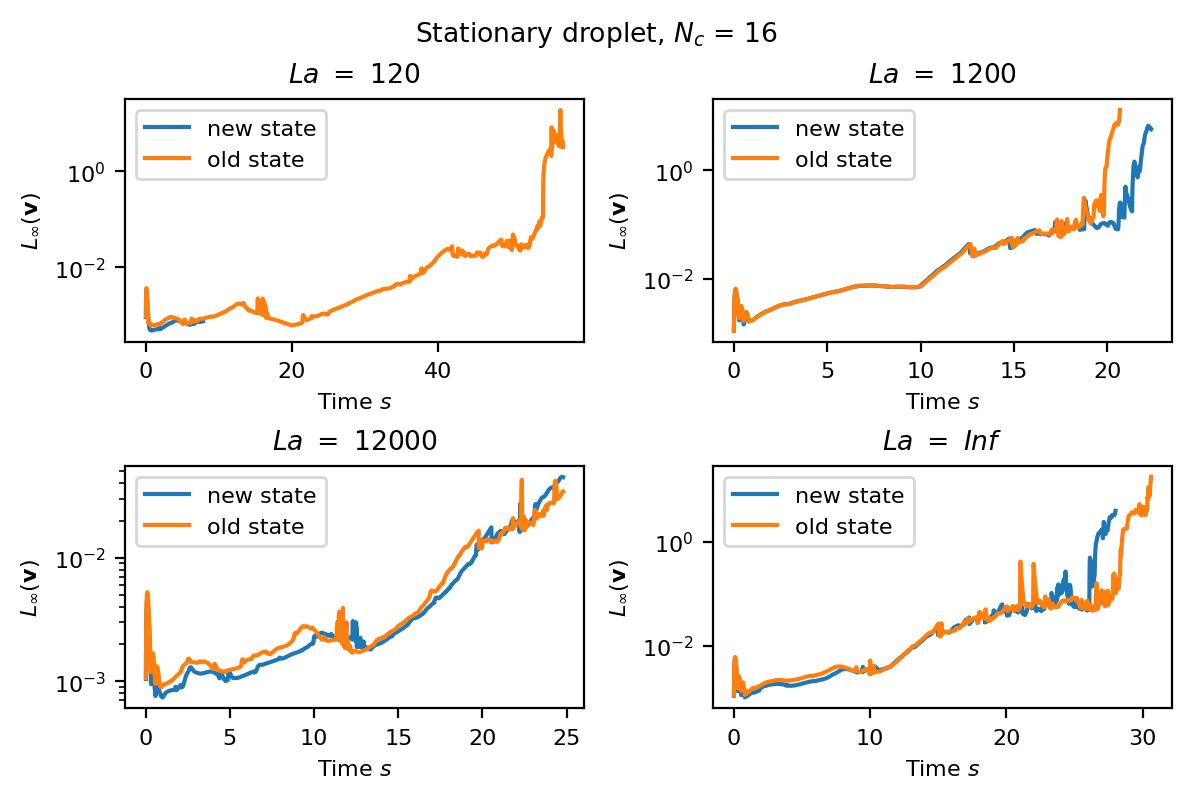

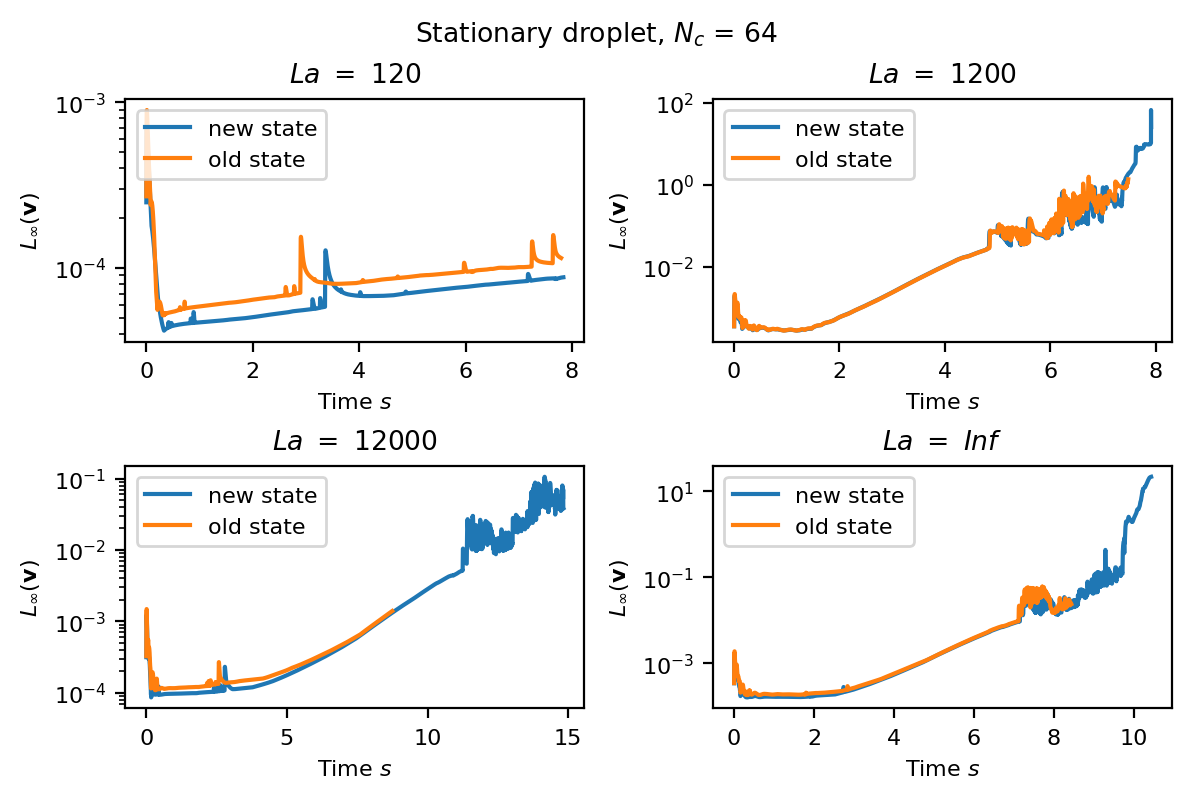

In [3]:
plot_comparison(old_state_df, popinet_2009_df1)

# CASE 2: withRhoEquation/withMomentumPredictor/limitedLinearV0.5

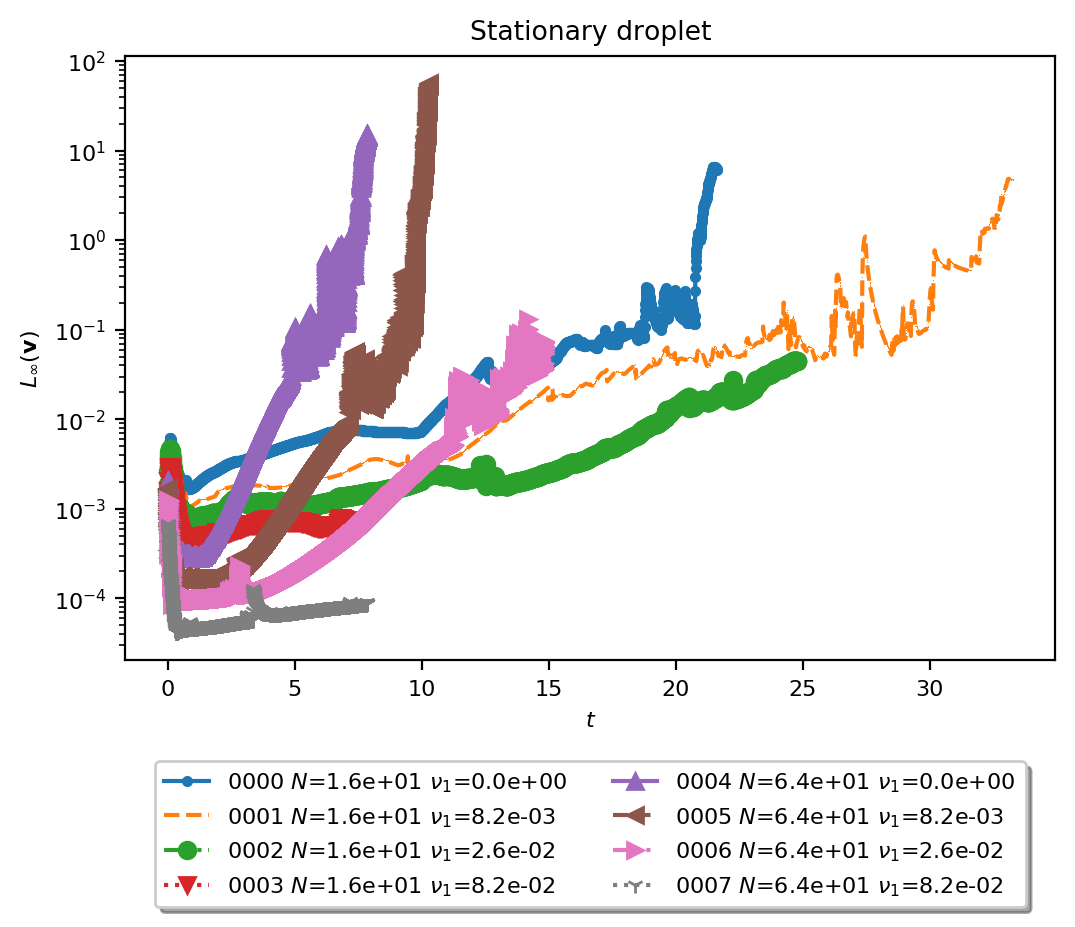

In [4]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom2  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "withRhoEquation/withMomentumPredictor/limitedLinearV0.5/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df2 = popinet_2009_agglom2.study_dataframe() 

plot_dframe(popinet_2009_df2, popinet_2009_agglom2, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


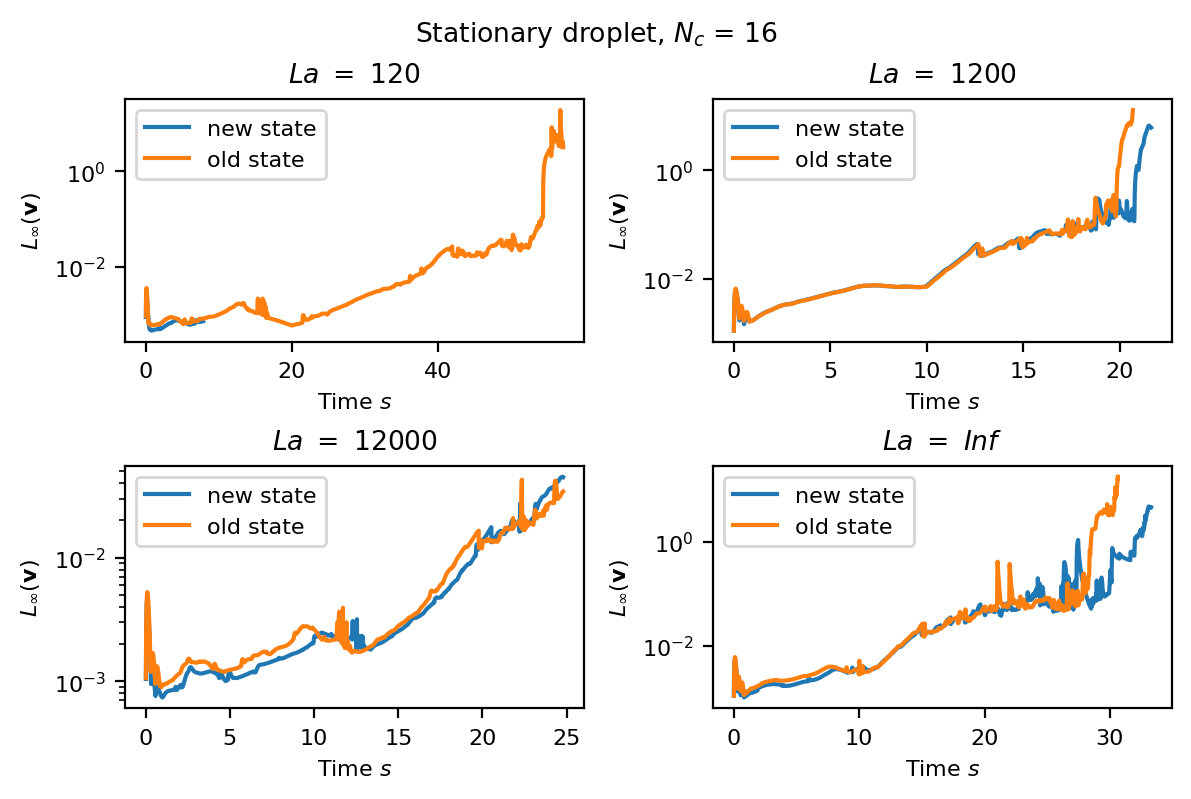

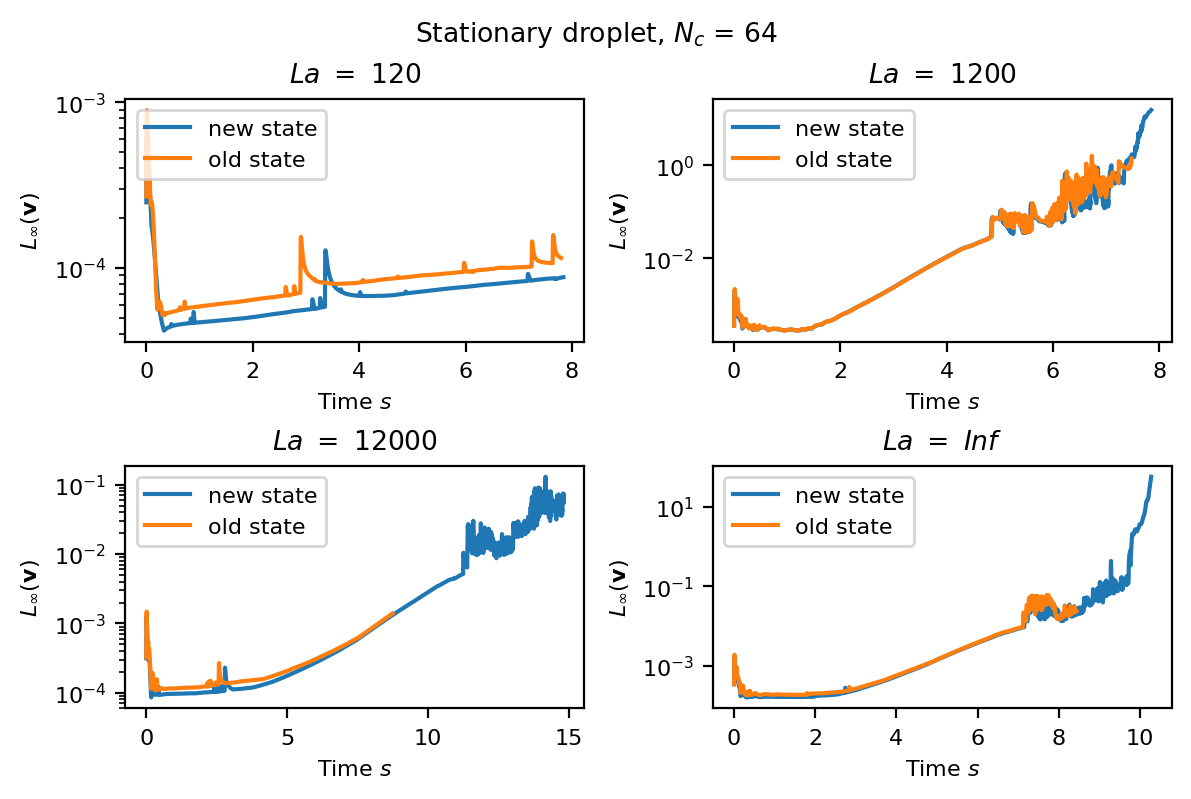

In [5]:
# Old state / vs new state plot...
plot_comparison(old_state_df, popinet_2009_df2)

# CASE 3: withRhoEquation/noMomentumPredictor/limitedLinearV1

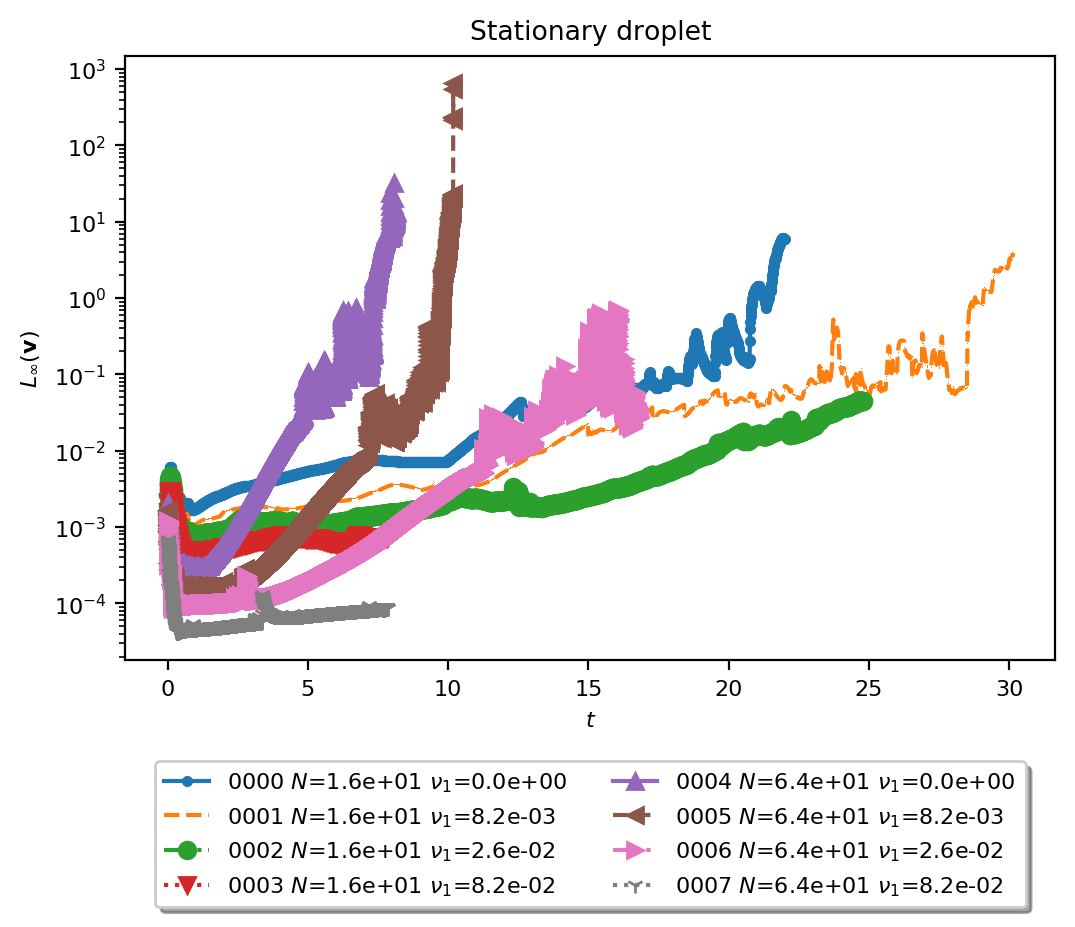

In [6]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom3  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "withRhoEquation/noMomentumPredictor/limitedLinearV1/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df3 = popinet_2009_agglom3.study_dataframe() 

plot_dframe(popinet_2009_df3, popinet_2009_agglom3, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


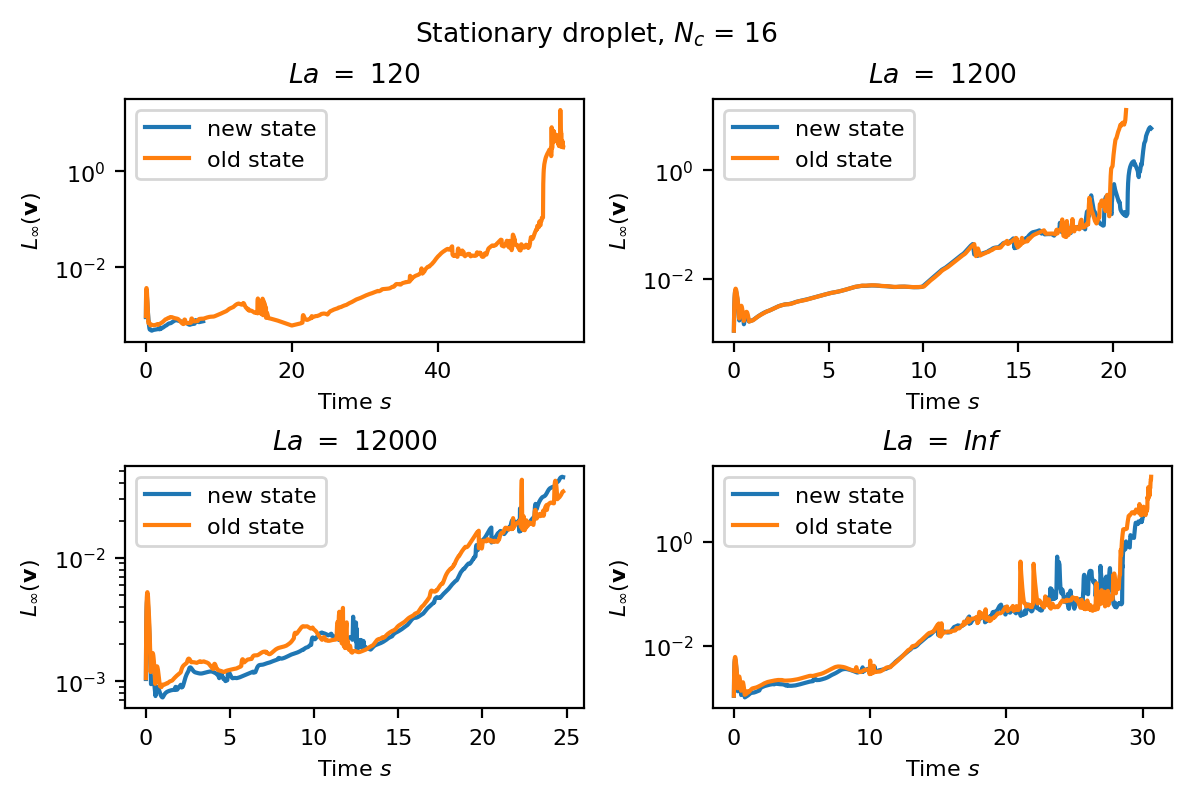

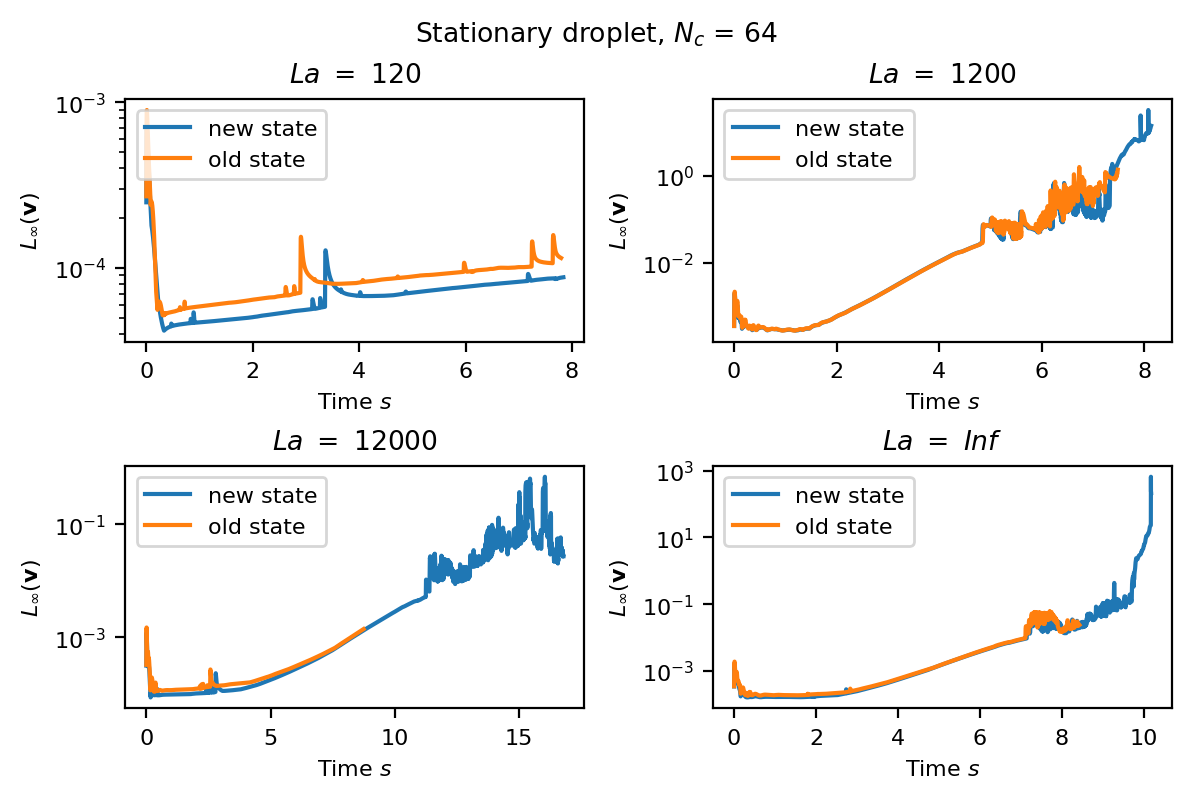

In [7]:
plot_comparison(old_state_df, popinet_2009_df3)

# CASE 4: withRhoEquation/noMomentumPredictor/limitedLinearV0.5

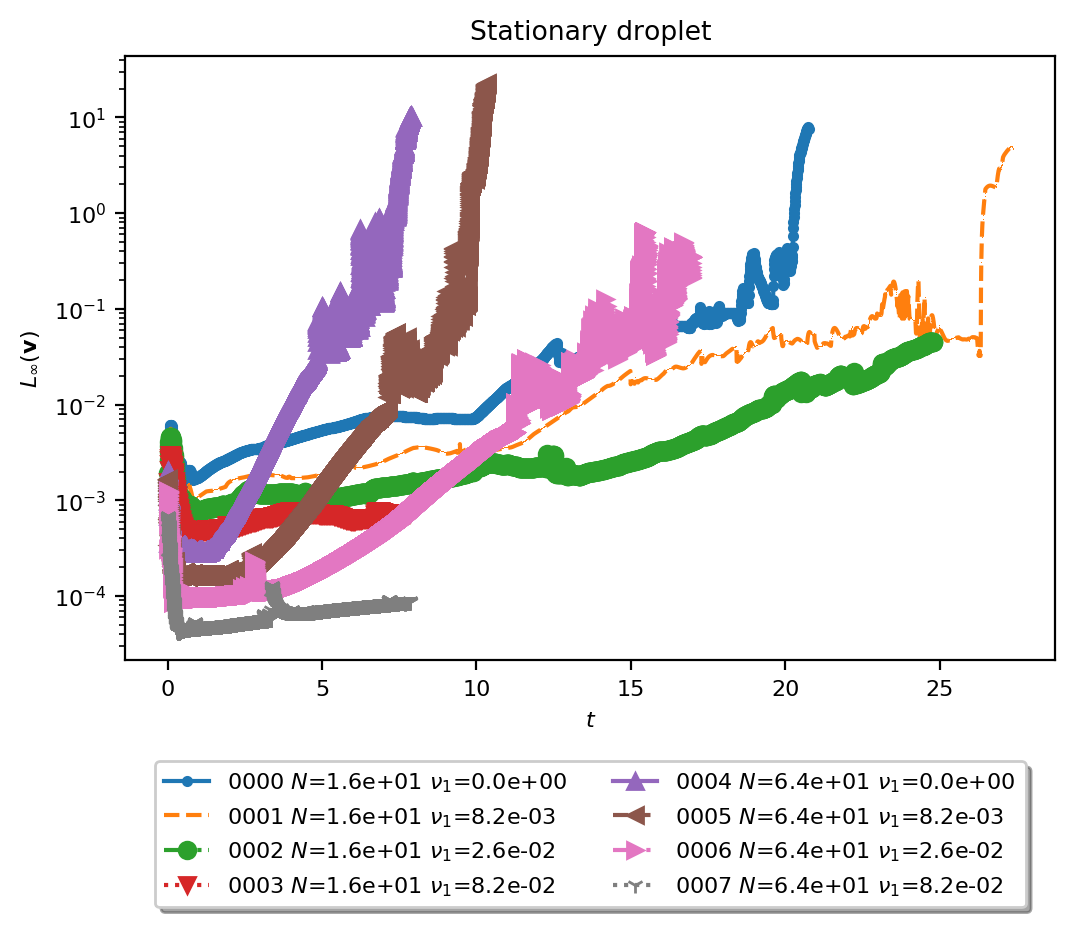

In [8]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom4  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "withRhoEquation/noMomentumPredictor/limitedLinearV0.5/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df4 = popinet_2009_agglom4.study_dataframe() 

plot_dframe(popinet_2009_df4, popinet_2009_agglom4, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


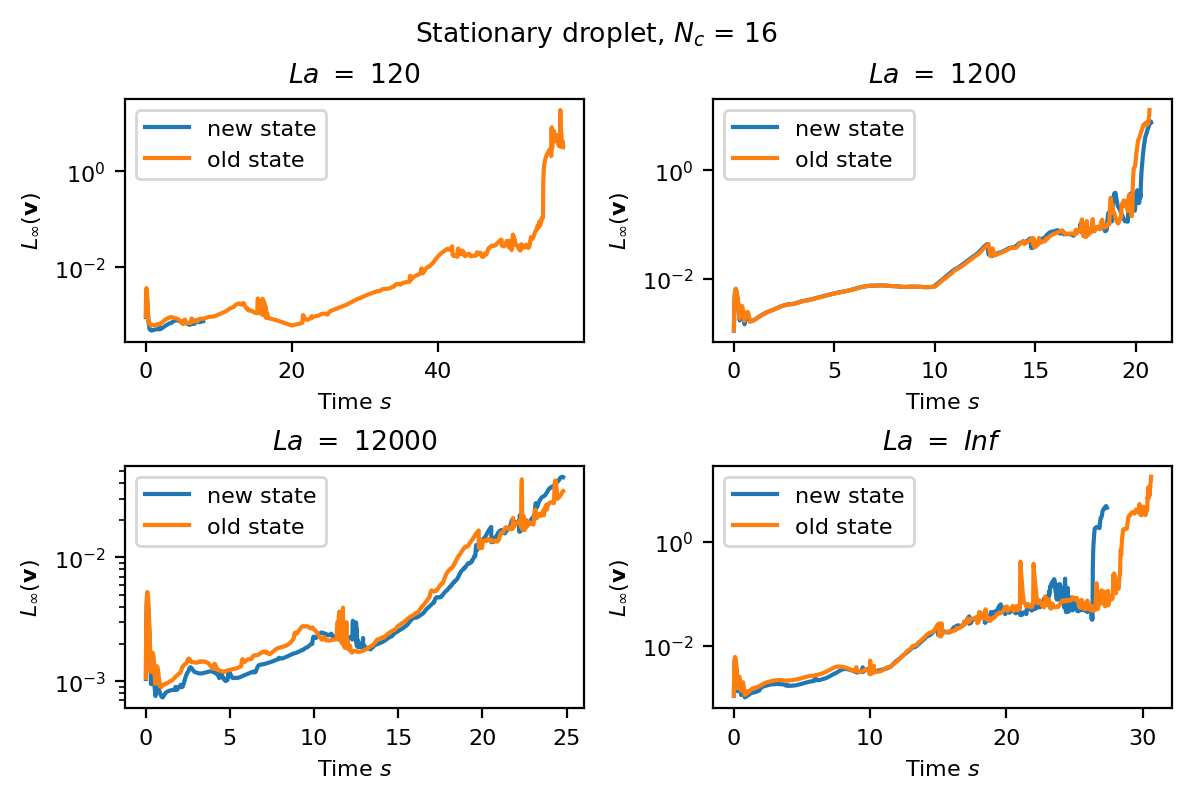

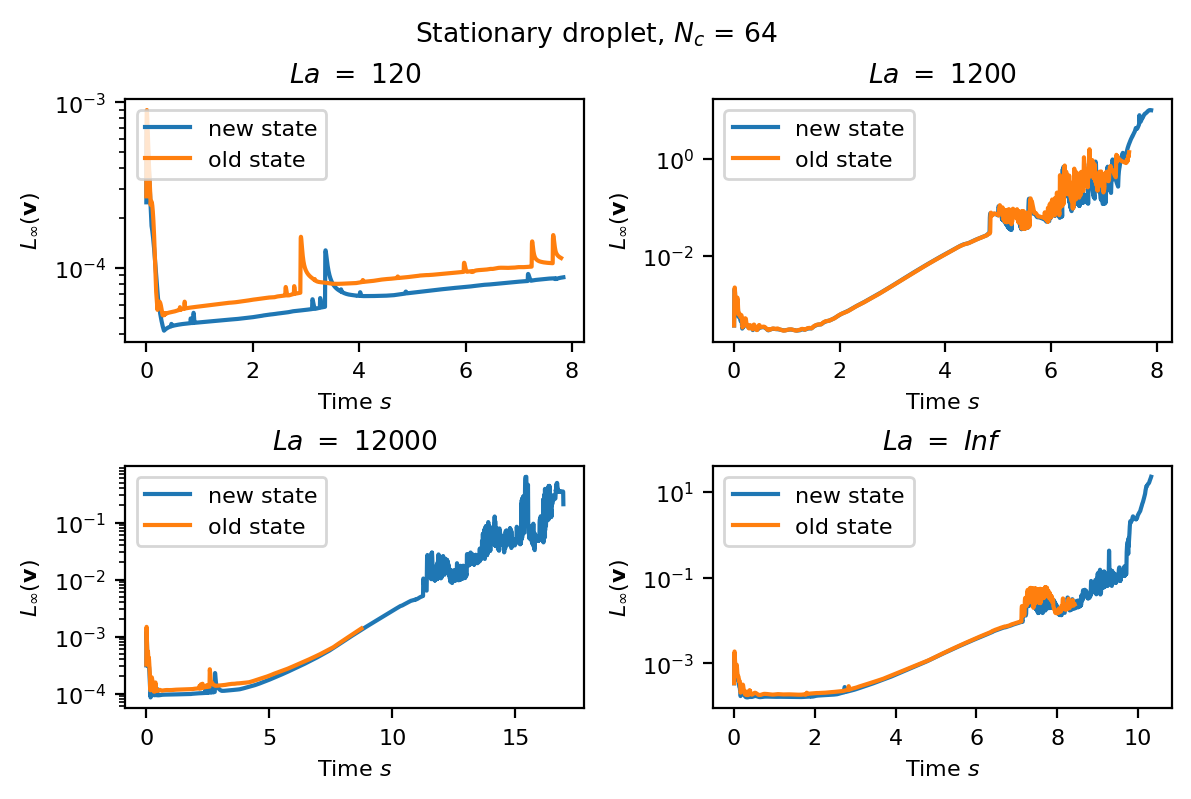

In [9]:
plot_comparison(old_state_df, popinet_2009_df4)

# CASE 5: noRhoEquation/withMomentumPredictor/limitedLinearV1

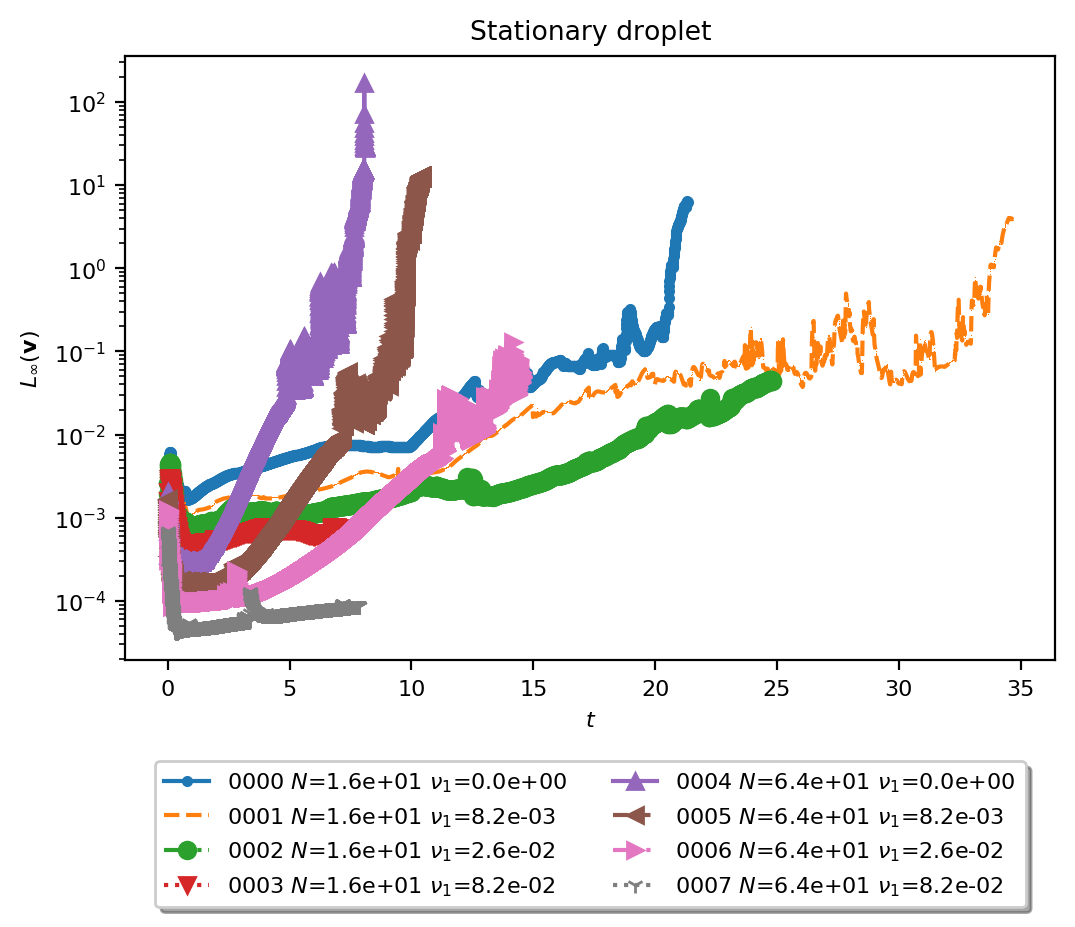

In [10]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom5  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "noRhoEquation/withMomentumPredictor/limitedLinearV1/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df5 = popinet_2009_agglom5.study_dataframe() 

plot_dframe(popinet_2009_df5, popinet_2009_agglom5, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


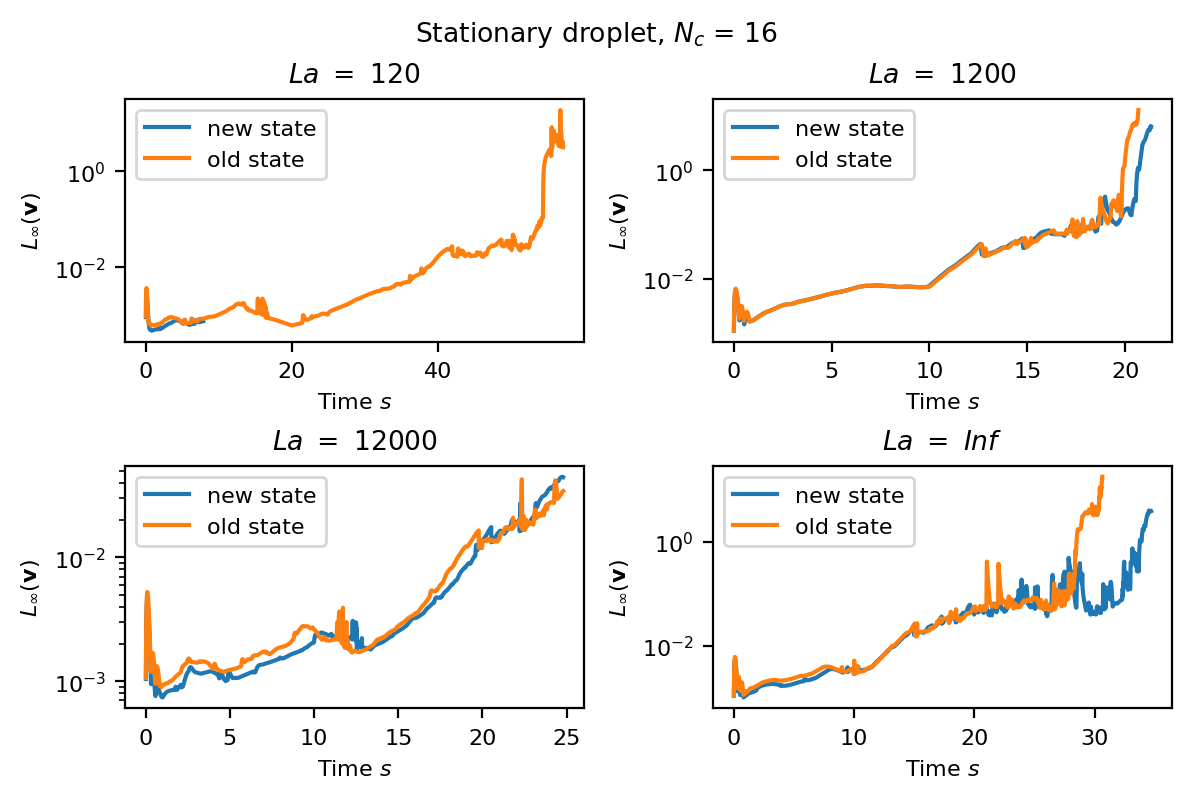

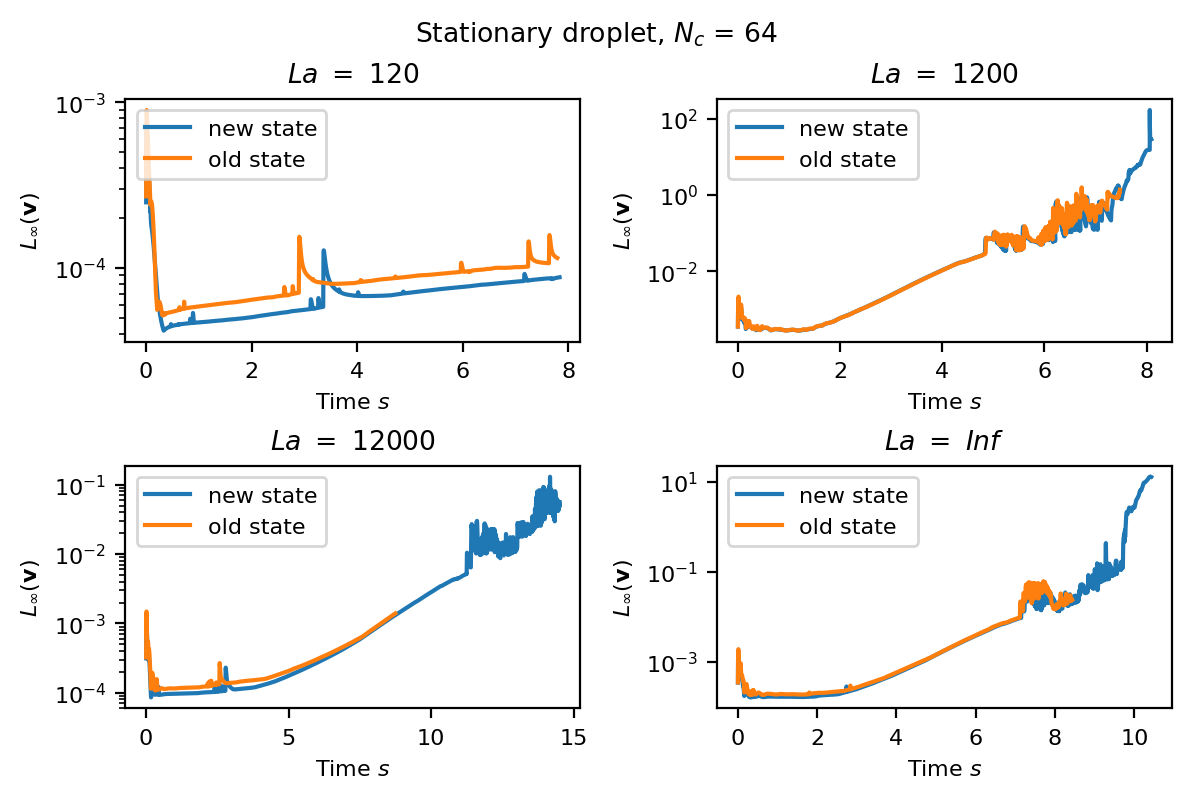

In [11]:
plot_comparison(old_state_df, popinet_2009_df5)

# CASE 6: noRhoEquation/withMomentumPredictor/limitedLinearV0.5

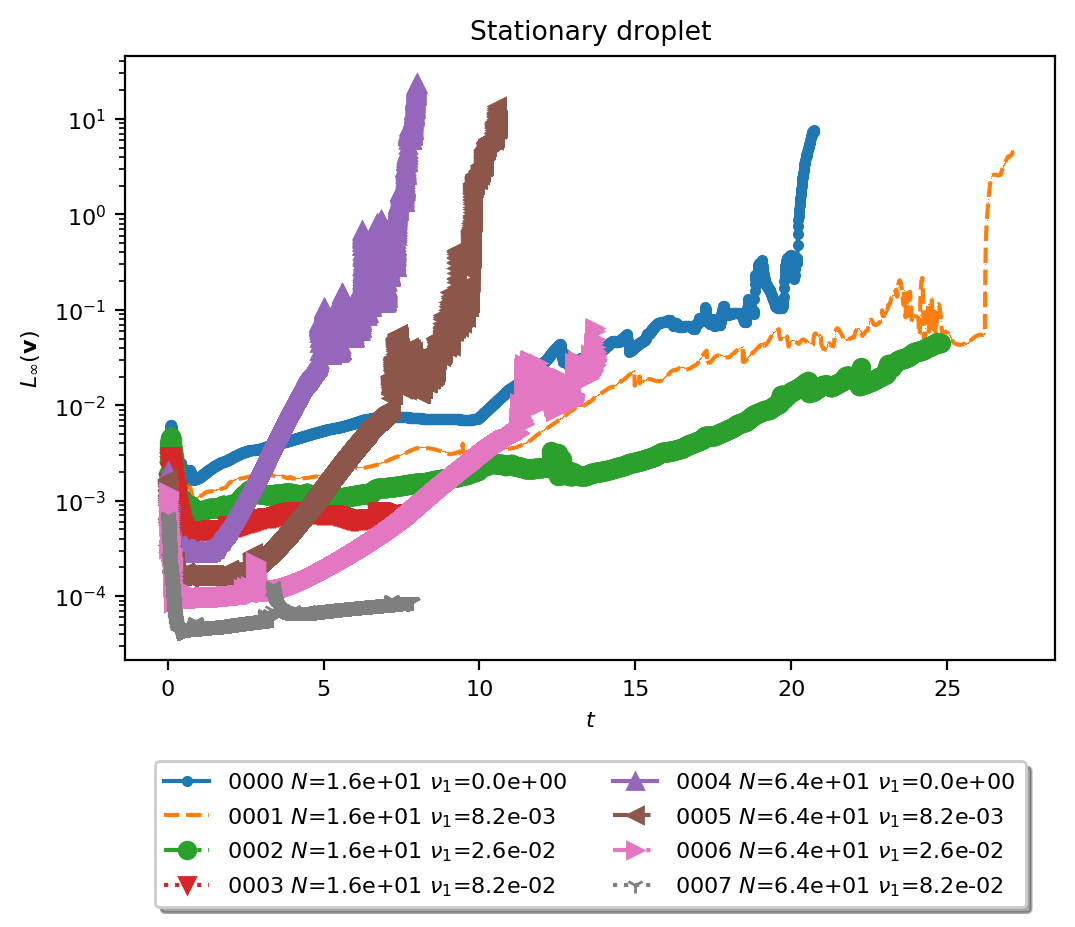

In [12]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom6  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "noRhoEquation/withMomentumPredictor/limitedLinearV0.5/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df6 = popinet_2009_agglom6.study_dataframe() 

plot_dframe(popinet_2009_df6, popinet_2009_agglom6, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


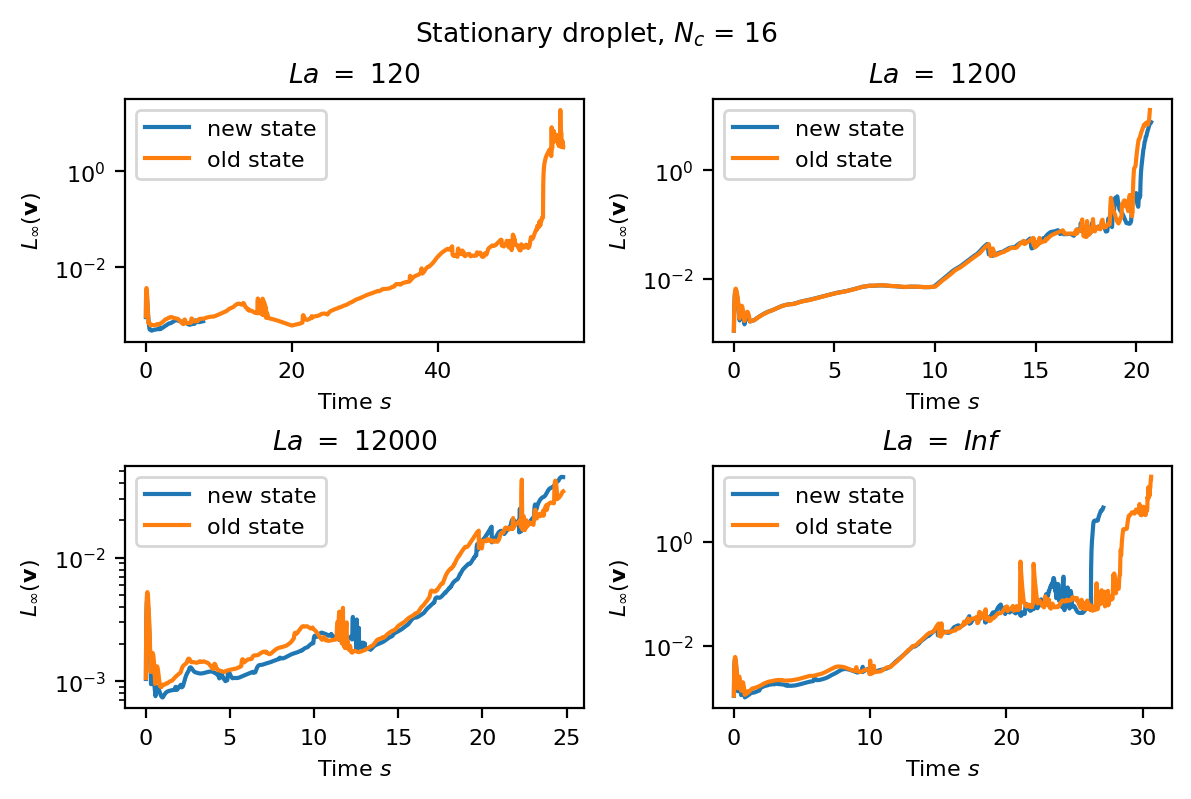

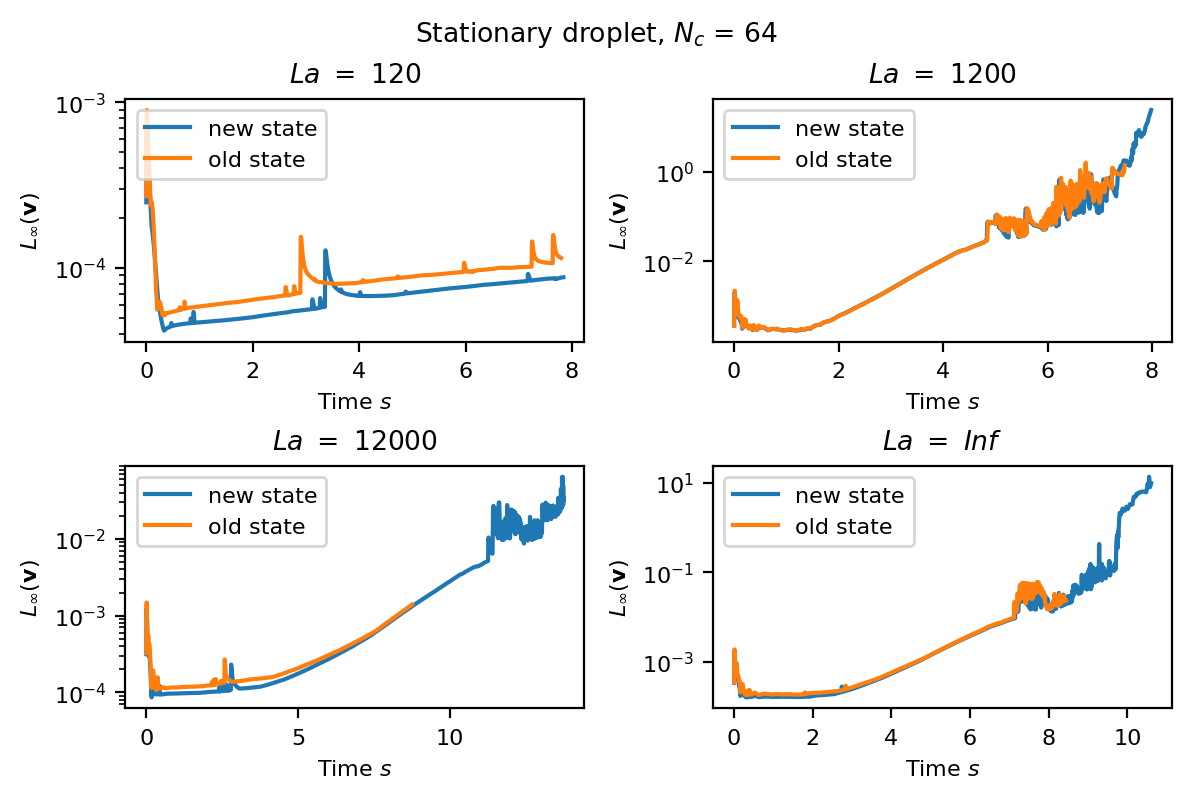

In [13]:
plot_comparison(old_state_df, popinet_2009_df6)

# CASE 7: noRhoEquation/noMomentumPredictor/limitedLinearV1

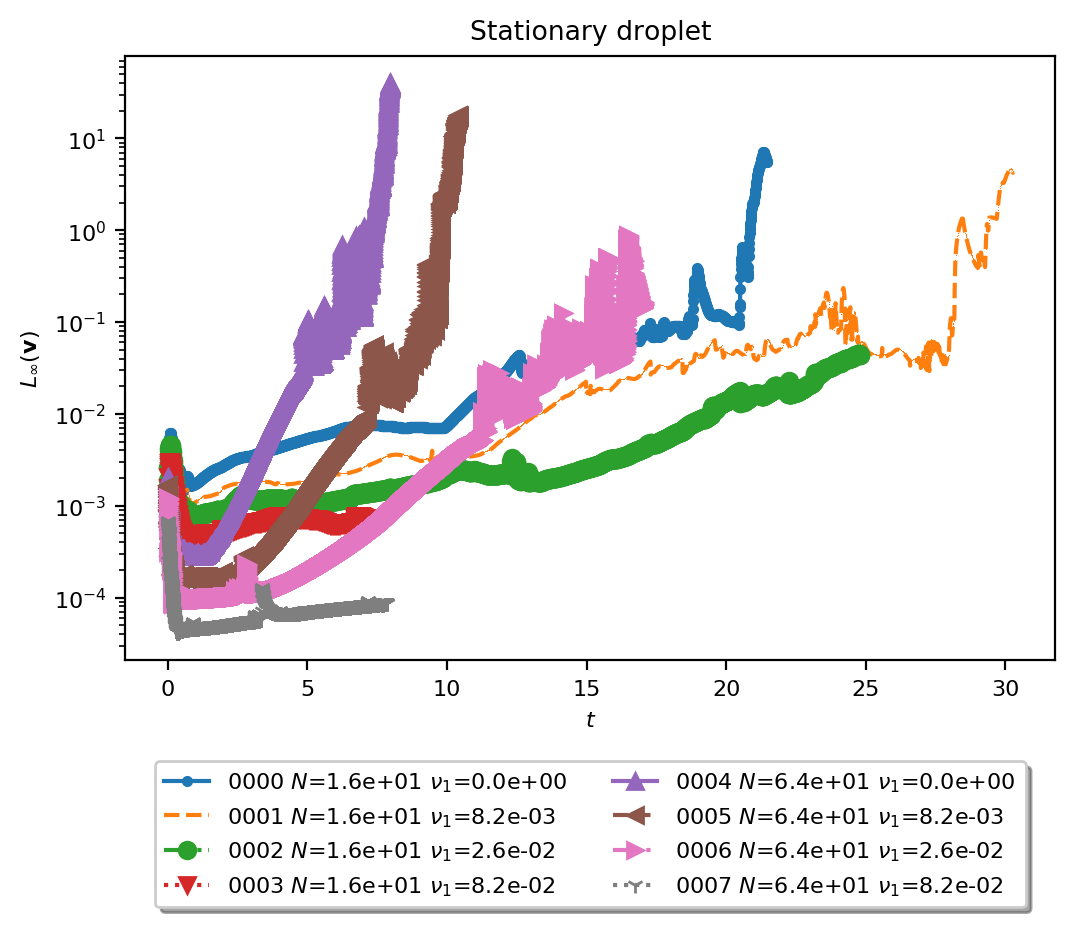

In [14]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom7  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "noRhoEquation/noMomentumPredictor/limitedLinearV1/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df7 = popinet_2009_agglom7.study_dataframe() 

plot_dframe(popinet_2009_df7, popinet_2009_agglom7, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


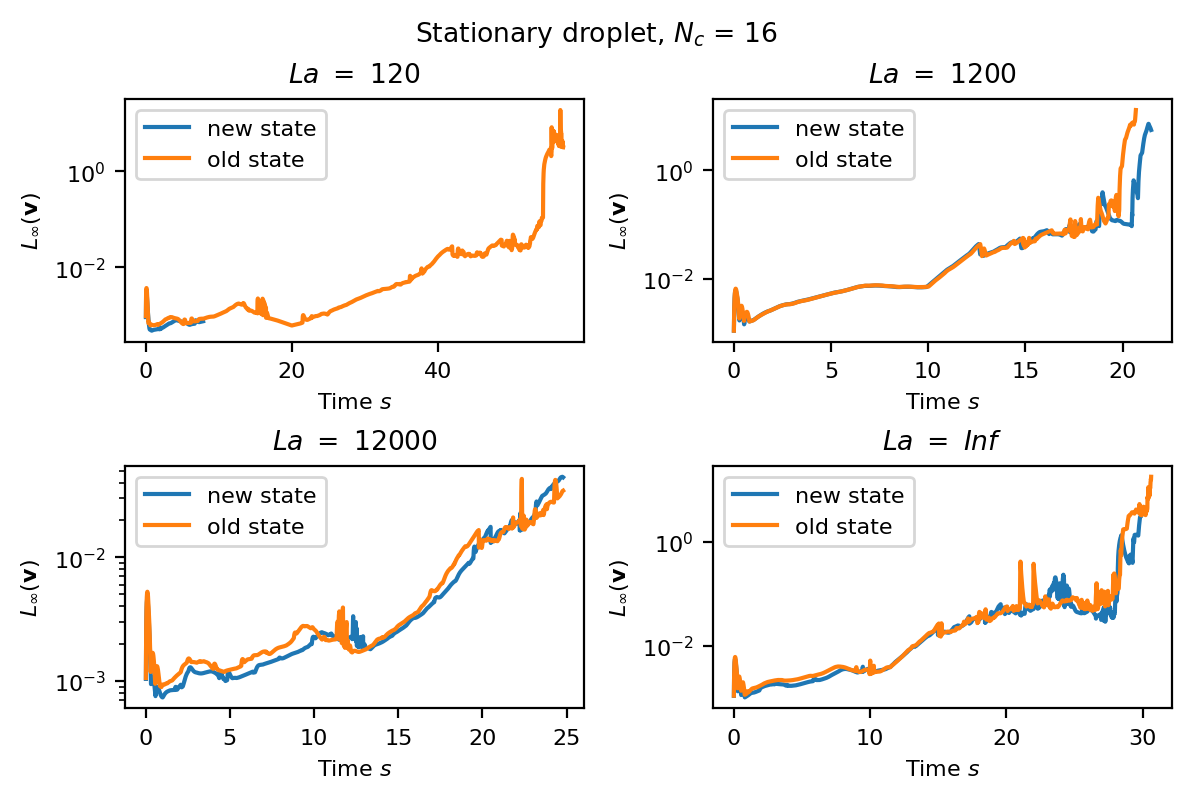

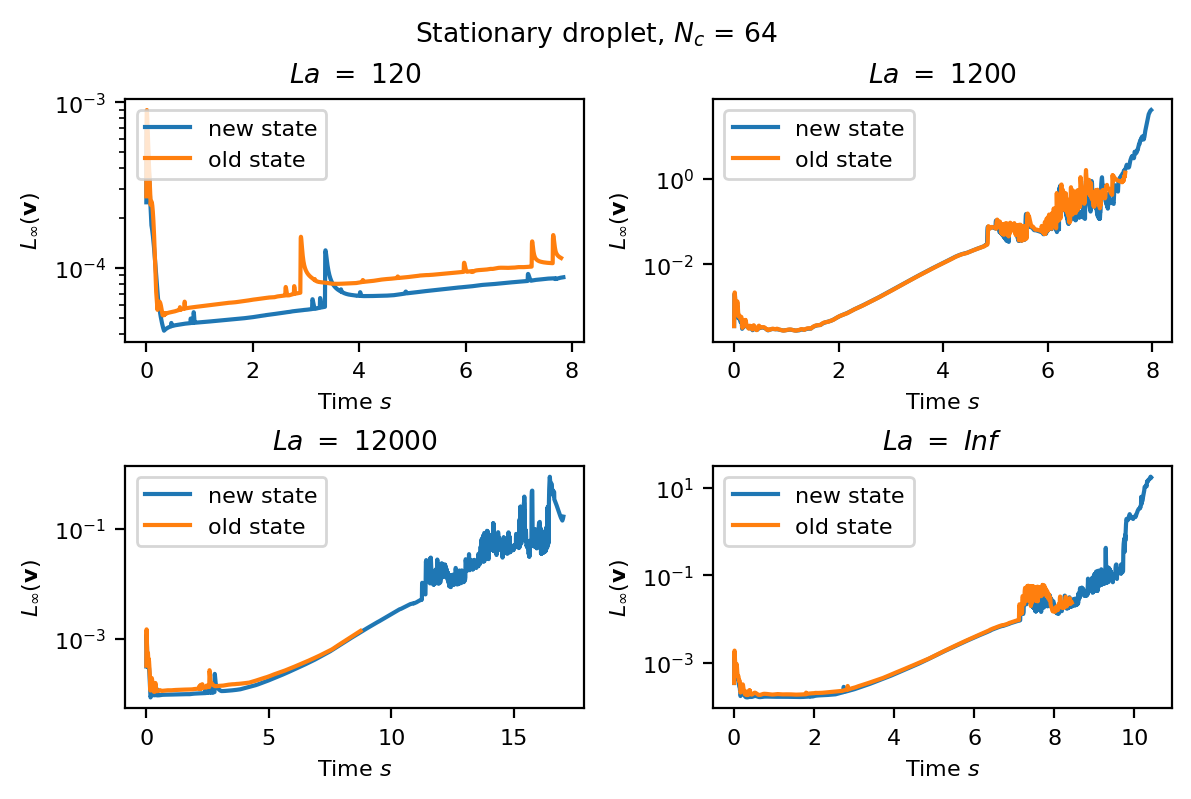

In [15]:
plot_comparison(old_state_df, popinet_2009_df7)

# CASE 8: noRhoEquation/noMomentumPredictor/limitedLinearV0.5

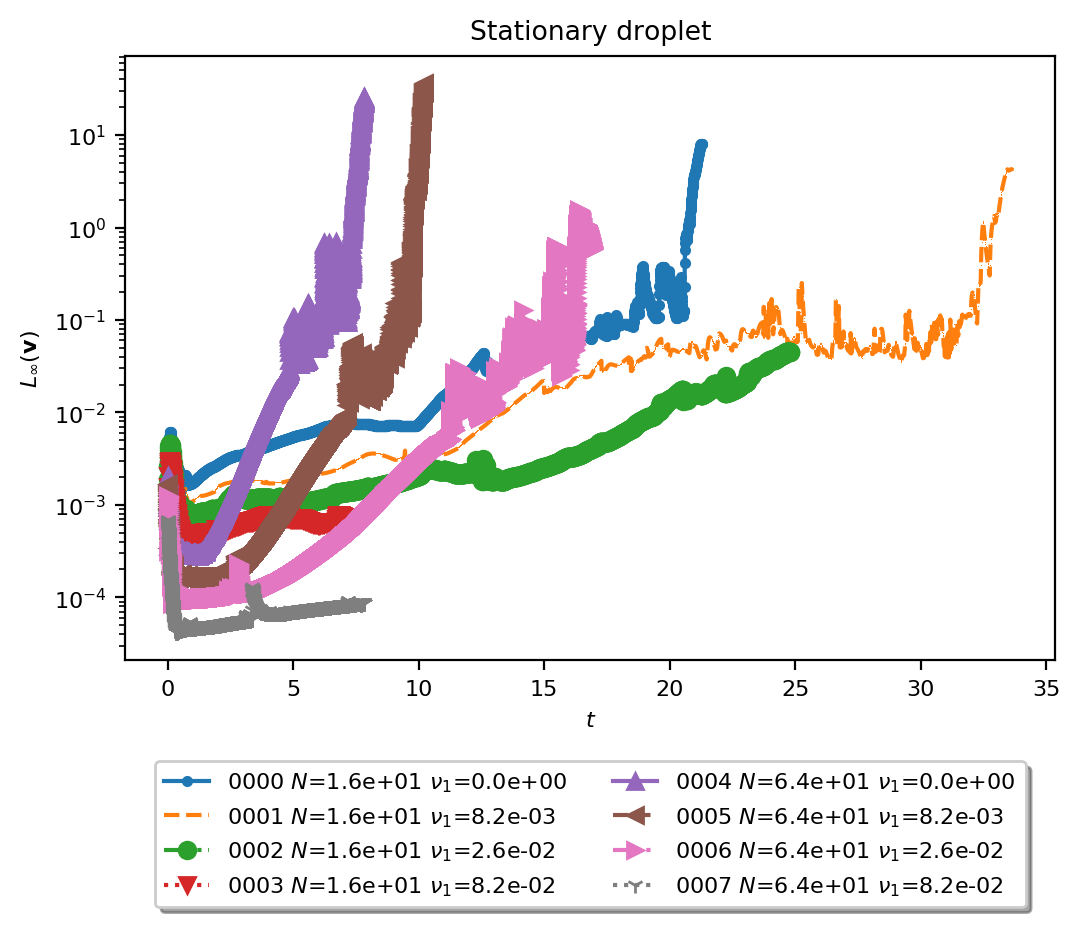

In [16]:
rcParams["figure.dpi"] = 200
popinet_2009_agglom8  = datglom.data_agglomerator("popinet2009.parameter", 
                                                 "noRhoEquation/noMomentumPredictor/limitedLinearV0.5/popinet2009.parameter_00000_template_copy_hexrefined",
                                                 "stationaryDropletResults.csv") 

popinet_2009_df8 = popinet_2009_agglom8.study_dataframe() 

plot_dframe(popinet_2009_df8, popinet_2009_agglom8, 
            title="Stationary droplet", 
            plotDict=plotDict)

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


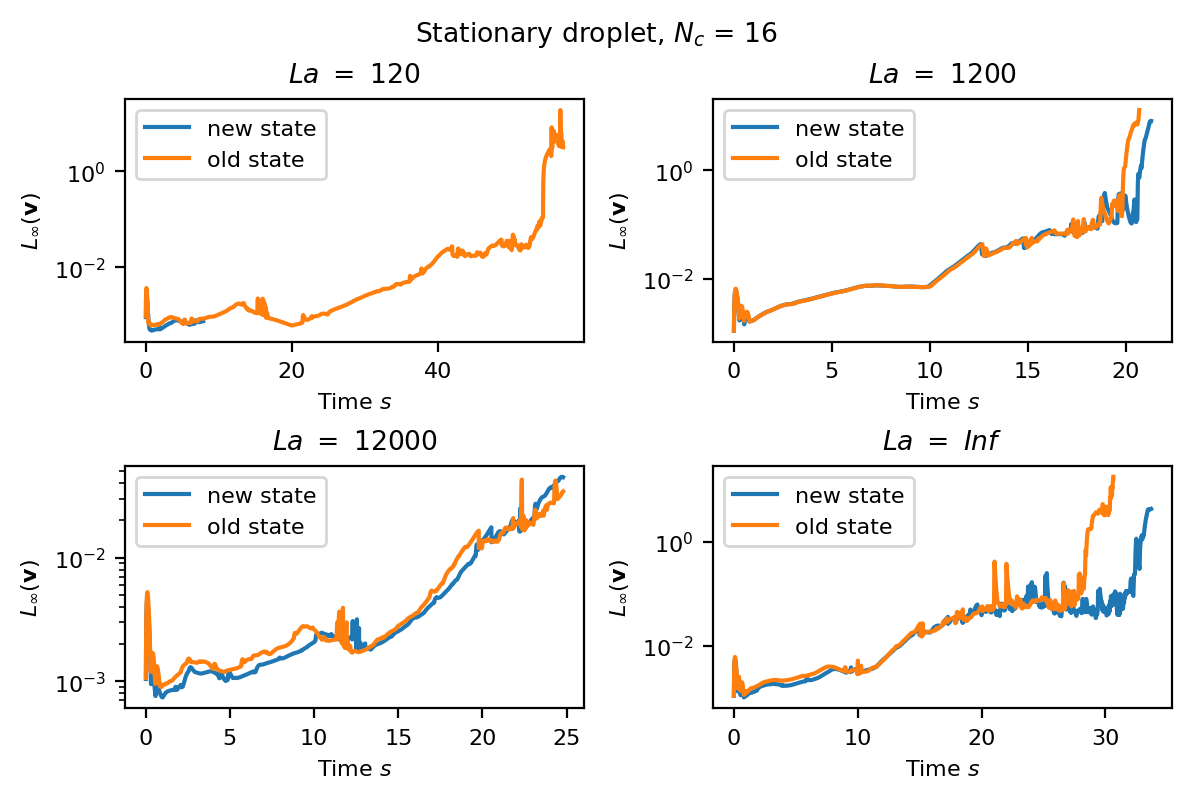

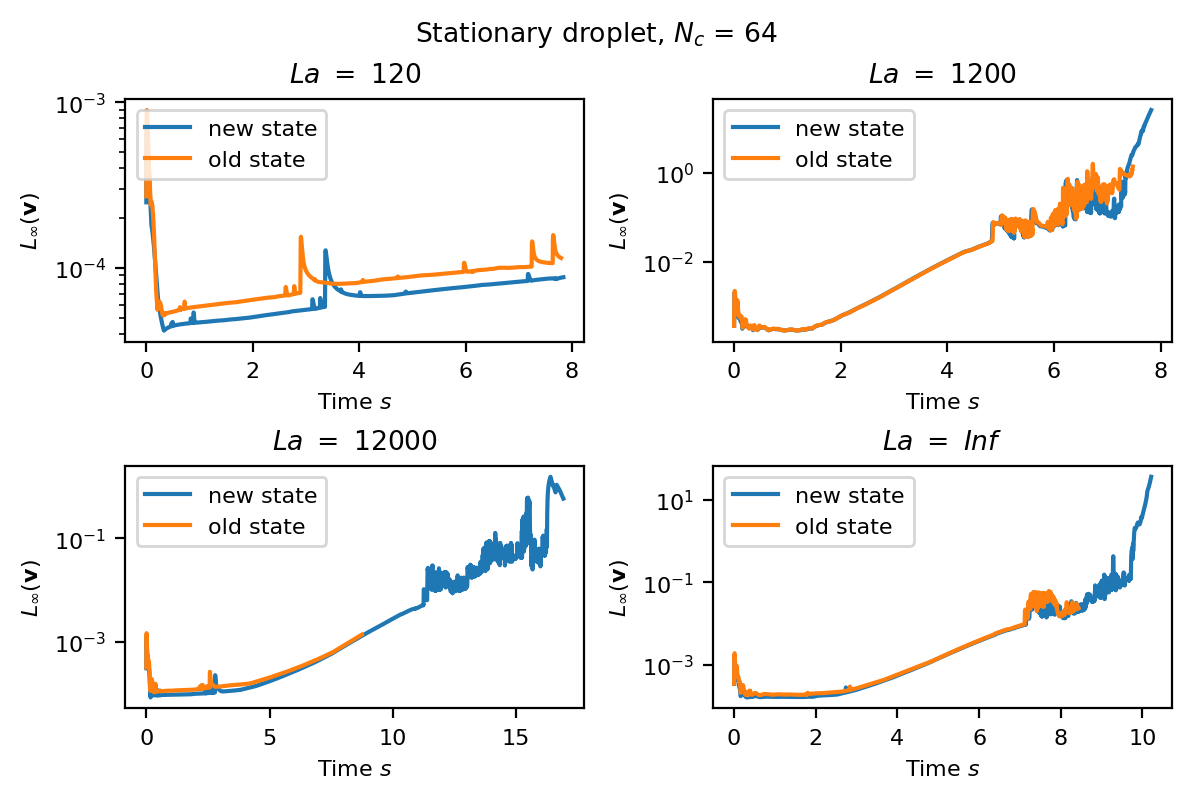

In [17]:
plot_comparison(old_state_df, popinet_2009_df8)

In [18]:
# rcParams["figure.dpi"] = 200
# popinet_2009_agglom  = datglom.data_agglomerator("popinet2009.parameter", 
#                                                  "noMomentumPredictor/popinet2009.parameter_00000_template_copy_hexrefined",
#                                                  "stationaryDropletResults.csv") 

# popinet_2009_df = popinet_2009_agglom.study_dataframe() 

# plot_dframe(popinet_2009_df, popinet_2009_agglom, 
#             title="Stationary droplet", 
#             plotDict=plotDict)

In [19]:
# rcParams["figure.dpi"] = 200
# idx = pd.IndexSlice
# plot_dframe(popinet_2009_df.loc[idx[[16],:,:,:]],
#             popinet_2009_agglom,
#             title="Stationary droplet $N_c$=16", 
#             plotDict=plotDict)

In [20]:
# rcParams["figure.dpi"] = 200
# plot_dframe(popinet_2009_df.loc[idx[[64],:,:,:]],
#             popinet_2009_agglom,
#             title="Stationary droplet $N_c$=64", 
#             plotDict=plotDict)